#**Introduction of The Dataset "Student Adaptivity Level on Online Education"**

> Online Education has become a buzzword since the COVID-19 hit the World. Most of the educational institutions went online to continue educational activities while developing countries like Bangladesh took a significant period of time to ensure online education at every education level. Students of several levels also faced many difficulties when they got introduced to online education. It is important for the decisionmakers of educational institutions to be informed about the effectiveness of online education so that they can take further steps to make it more beneficial for the students. Our main motivation is to contribute to this matter by analyzing the relevant factors associated with online education. In this work, we have collected students’ information of all three different levels(School, College, and University) by conducting both online and physical surveys. The surveys form consists of an individual’s socio-demographic factors.



##**1) Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##**2) Load Dataset**

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/DATA SCIENCE/dibimbing/Final Project/students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
# Replace name columns & value/name in the columns
df['Gender'] = df['Gender'].replace(['Boy','Girl'],['Male','Female'])
df['Financial Condition']= df['Financial Condition'].replace(['Mid','Poor','Rich'],['Middle Class','Lower Class','Upper Class'])

In [ ]:
# Change the name columns with whitespace 
df.columns = ['Gender', 'Age', 'Education_Level', 'Institution_Type', 'IT_Student',
       'Location', 'Load_Shedding', 'Financial_Condition', 'Internet_Type',
       'Network_Type', 'Class_Duration', 'Self_LMS', 'Device',
       'Adaptivity_Level']

In [ ]:
df.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_Shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_LMS,Device,Adaptivity_Level
0,Male,21-25,University,Non Government,No,Yes,Low,Middle Class,Wifi,4G,3-6,No,Tab,Moderate
1,Female,21-25,University,Non Government,No,Yes,High,Middle Class,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Female,16-20,College,Government,No,Yes,Low,Middle Class,Wifi,4G,1-3,No,Mobile,Moderate
3,Female,11-15,School,Non Government,No,Yes,Low,Middle Class,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Female,16-20,School,Non Government,No,Yes,Low,Lower Class,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
df.shape

(1205, 14)

In [ ]:
# View All Value Counts From Features/Columns
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column              value                 
Adaptivity_Level    High               100
                    Low                480
                    Moderate           625
Age                 6-10                51
                    26-30               68
                    1-5                 81
                    16-20              278
                    11-15              353
                    21-25              374
Class_Duration      0                  154
                    3-6                211
                    1-3                840
Device              Tab                 30
                    Computer           162
                    Mobile            1013
Education_Level     College            219
                    University         456
                    School             530
Financial_Condition Upper Class         85
                    Lower Class        242
                    Middle Class       878
Gender              Female             542
                    Male               663
IT_Student          Yes                304
                    No                 901
Institution_Type    Government         382
                    Non Government     823
Internet_Type       Wifi               510
                    Mobile Data        695
Load_Shedding       High               201
                    Low               1004
Location            No                 270
                    Yes                935
Network_Type        2G                  19
                    3G                 411
                    4G                 775
Self_LMS            Yes                210
                    No                 995

##**3) Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education_Level      1205 non-null   object
 3   Institution_Type     1205 non-null   object
 4   IT_Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load_Shedding        1205 non-null   object
 7   Financial_Condition  1205 non-null   object
 8   Internet_Type        1205 non-null   object
 9   Network_Type         1205 non-null   object
 10  Class_Duration       1205 non-null   object
 11  Self_LMS             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity_Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
df.isnull().sum()

Gender                 0
Age                    0
Education_Level        0
Institution_Type       0
IT_Student             0
Location               0
Load_Shedding          0
Financial_Condition    0
Internet_Type          0
Network_Type           0
Class_Duration         0
Self_LMS               0
Device                 0
Adaptivity_Level       0
dtype: int64

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Gender                 0.0
Age                    0.0
Education_Level        0.0
Institution_Type       0.0
IT_Student             0.0
Location               0.0
Load_Shedding          0.0
Financial_Condition    0.0
Internet_Type          0.0
Network_Type           0.0
Class_Duration         0.0
Self_LMS               0.0
Device                 0.0
Adaptivity_Level       0.0
dtype: float64

##**4) Exploratory Data Analysis With Deep-Dive Exploration**

###**a) Statistical Summary/Descriptive**

In [ ]:
# Grouping columns in certain categories
UserProfile = ['Gender','Age','Financial_Condition','IT_Student','Location','Load_Shedding']
EducationProfile = ['Education_Level','Institution_Type','Self_LMS','Class_Duration']
UserService = ['Internet_Type','Network_Type','Device']


In [ ]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Male,663
Age,1205,6,21-25,374
Education_Level,1205,3,School,530
Institution_Type,1205,2,Non Government,823
IT_Student,1205,2,No,901
Location,1205,2,Yes,935
Load_Shedding,1205,2,Low,1004
Financial_Condition,1205,3,Middle Class,878
Internet_Type,1205,2,Mobile Data,695
Network_Type,1205,3,4G,775


###**b) Univariate Analysis**

####**Using Bar Plot to View Adaptivity Level as a Target Variable**

% Adaptavity are
 Moderate    51.867
Low         39.834
High         8.299
Name: Adaptivity_Level, dtype: float64


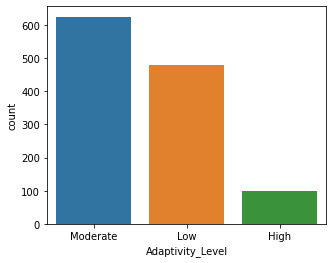

In [ ]:
plt.figure(figsize=(5,4))

adaptability_count = sns.countplot(df["Adaptivity_Level"])
print("% Adaptavity are\n", round(df['Adaptivity_Level'].value_counts() / df['Adaptivity_Level'].count()*100,3))

####**Using Bar Plot to Know Categorical Data Distribution**

Value % of Gender column
Male      55.02
Female    44.98
Name: Gender, dtype: float64 

Value % of Age column
21-25    31.04
11-15    29.29
16-20    23.07
1-5       6.72
26-30     5.64
6-10      4.23
Name: Age, dtype: float64 

Value % of Financial_Condition column
Middle Class    72.86
Lower Class     20.08
Upper Class      7.05
Name: Financial_Condition, dtype: float64 

Value % of IT_Student column
No     74.77
Yes    25.23
Name: IT_Student, dtype: float64 

Value % of Location column
Yes    77.59
No     22.41
Name: Location, dtype: float64 

Value % of Load_Shedding column
Low     83.32
High    16.68
Name: Load_Shedding, dtype: float64 



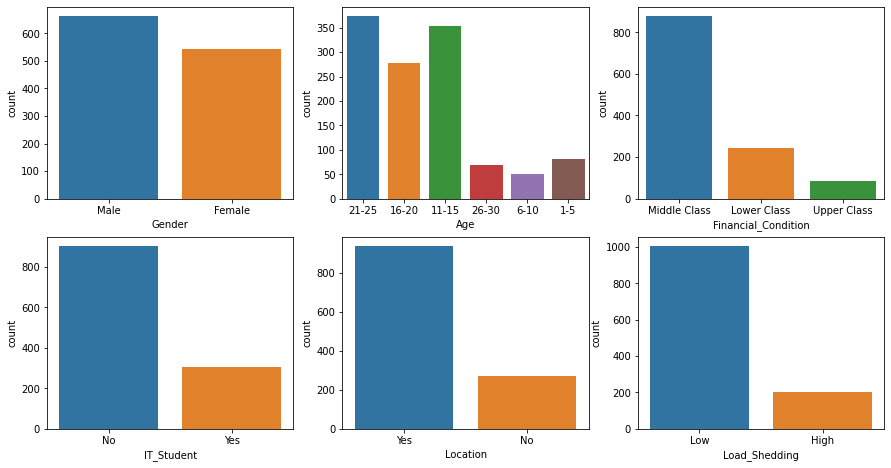

In [ ]:
#Memunculkan Percentage untuk UserProfile
for col in UserProfile:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk UserProfile
plt.figure(figsize=(15,12))

for i,col in enumerate(UserProfile):    
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col)

Value % of Education_Level column
School        43.98
University    37.84
College       18.17
Name: Education_Level, dtype: float64 

Value % of Institution_Type column
Non Government    68.3
Government        31.7
Name: Institution_Type, dtype: float64 

Value % of Self_LMS column
No     82.57
Yes    17.43
Name: Self_LMS, dtype: float64 

Value % of Class_Duration column
1-3    69.71
3-6    17.51
0      12.78
Name: Class_Duration, dtype: float64 



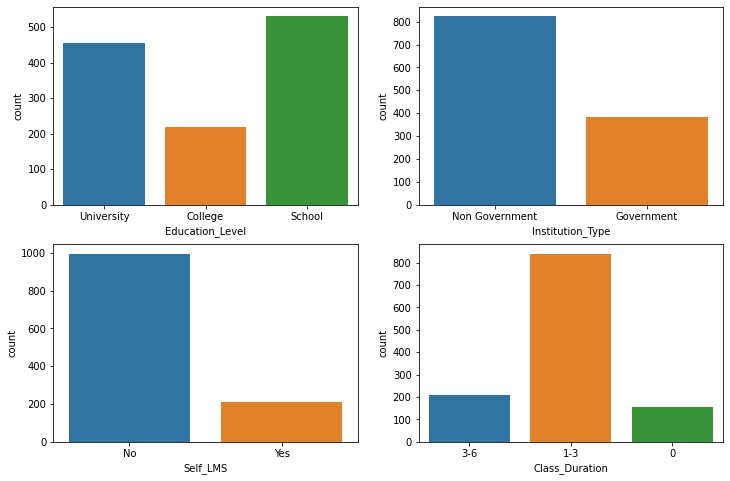

In [ ]:
#Memunculkan Percentage untuk EducationProfile
for col in EducationProfile:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk EducationProfile
plt.figure(figsize=(12,8))

for i,col in enumerate(EducationProfile):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col)

Value % of Internet_Type column
Mobile Data    57.68
Wifi           42.32
Name: Internet_Type, dtype: float64 

Value % of Network_Type column
4G    64.32
3G    34.11
2G     1.58
Name: Network_Type, dtype: float64 

Value % of Device column
Mobile      84.07
Computer    13.44
Tab          2.49
Name: Device, dtype: float64 



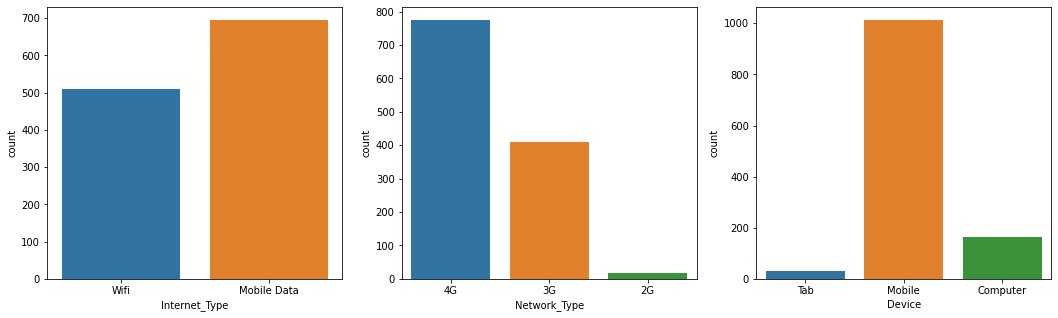

In [ ]:
#Memunculkan Percentage untuk UserService
for col in UserService:
  print(f"Value % of {col} column")
  print(round(df[col].value_counts()/len(df)*100,2),"\n")

#Membuat Bar Plot untuk UserService
plt.figure(figsize=(18,5))

for i,col in enumerate(UserService):    
    plt.subplot(1,3,i + 1)
    ax = sns.countplot(data = df, x = col)

###**b) Multivariate Analysis**

####**Using Bar Plot to Know Relationship between Categorical Data Distribution with Target Variable**

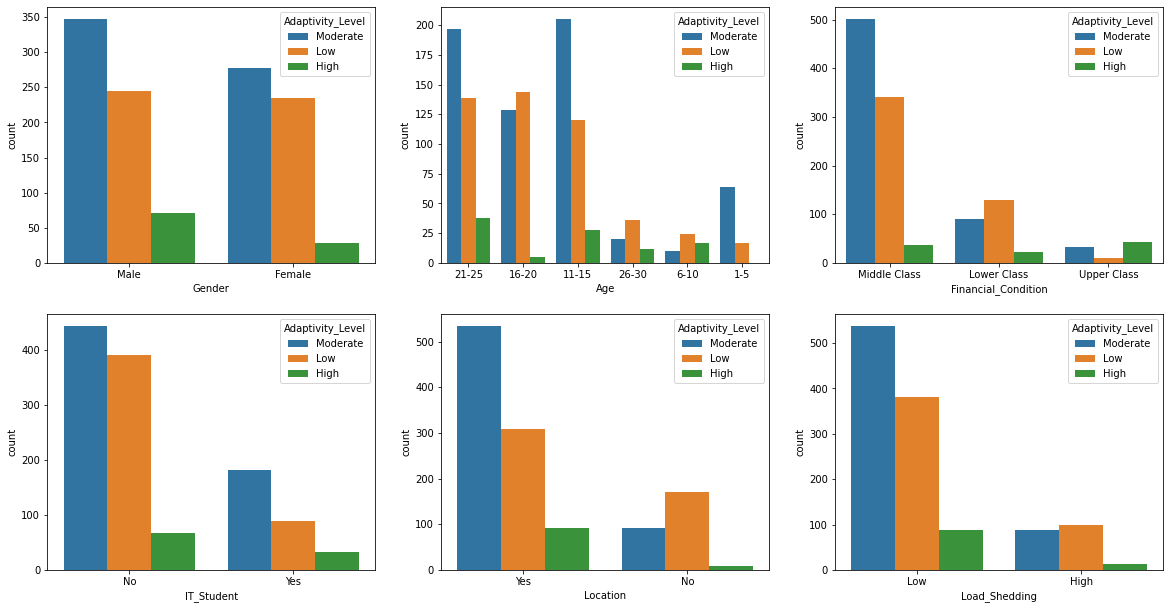

In [ ]:
#Melihat Hubungan Adaptivity Level dengan UserProfile
plt.figure(figsize=(20,16))

for i, col in enumerate(UserProfile):    
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Adaptivity_Level")

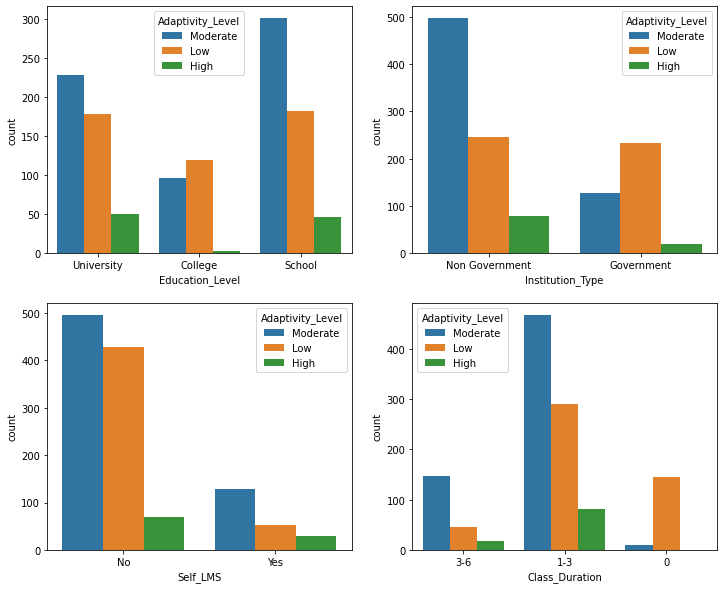

In [ ]:
#Melihat Hubungan Adaptivity Level dengan EducationProfile
plt.figure(figsize=(12,10))

for i, col in enumerate(EducationProfile):    
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Adaptivity_Level")

In [ ]:
def create_groups(
    df: pd.DataFrame, var1: str, 
    var2: str, var3: str)->pd.DataFrame:
    
    category = df.groupby([var1,var2,var3])[var3].count().to_frame()
    
    print('Adaptivity' + ' by ' + var2)
    
    return category
  

In [ ]:
create_groups(df, 'Education_Level', 'Gender', 'Adaptivity_Level')

Adaptivity by Gender


Adaptivity_Level
Education_Level Gender Adaptivity_Level                  
College         Female High                             3
                       Low                             76
                       Moderate                        52
                Male   Low                             44
                       Moderate                        44
School          Female High                            20
                       Low                             79
                       Moderate                       160
                Male   High                            27
                       Low                            103
                       Moderate                       141
University      Female High                             6
                       Low                             80
                       Moderate                        66
                Male   High                            44
                       Low                             98
                       Moderate                       162

In [ ]:
top_1= (df
            .groupby(['Education_Level','Gender'])
            .Adaptivity_Level.value_counts()
            .rename('Count')
            .reset_index()
            .sort_values('Count',ascending=True)
            .head(5)
            )
top_1

,Education_Level,Gender,Adaptivity_Level,Count
2,College,Female,High,3
13,University,Female,High,6
7,School,Female,High,20
10,School,Male,High,27
16,University,Male,High,44


In [ ]:
top_2 = (df
            .groupby(['Gender','Financial_Condition'])
            .Adaptivity_Level.value_counts()
            .rename('Count')
            .reset_index()
            .sort_values('Count',ascending=True)
            .head(30)
            )
top_2

,Gender,Financial_Condition,Adaptivity_Level,Count
8,Female,Upper Class,Low,5
17,Male,Upper Class,Low,5
2,Female,Lower Class,High,6
5,Female,Middle Class,High,9
6,Female,Upper Class,High,14
7,Female,Upper Class,Moderate,14
11,Male,Lower Class,High,16
16,Male,Upper Class,Moderate,19
14,Male,Middle Class,High,27
15,Male,Upper Class,High,28


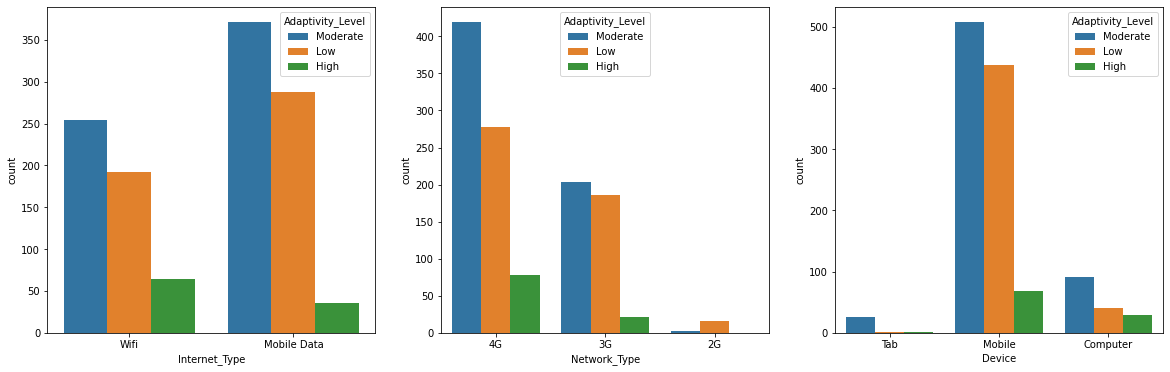

In [ ]:
#Membuat Bar Plot untuk UserService
plt.figure(figsize=(20,6))

for i, col in enumerate(UserService):    
    plt.subplot(1,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Adaptivity_Level")

##**5) Categorical Data Encoding**

In [ ]:
def cat_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [ ]:
cat_unique(df)

Gender : ['Male' 'Female']
Age : ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education_Level : ['University' 'College' 'School']
Institution_Type : ['Non Government' 'Government']
IT_Student : ['No' 'Yes']
Location : ['Yes' 'No']
Load_Shedding : ['Low' 'High']
Financial_Condition : ['Middle Class' 'Lower Class' 'Upper Class']
Internet_Type : ['Wifi' 'Mobile Data']
Network_Type : ['4G' '3G' '2G']
Class_Duration : ['3-6' '1-3' '0']
Self_LMS : ['No' 'Yes']
Device : ['Tab' 'Mobile' 'Computer']
Adaptivity_Level : ['Moderate' 'Low' 'High']


###**a) Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
scaler = OrdinalEncoder()
cols = df.columns
d = scaler.fit_transform(df)

df= pd.DataFrame(d, columns=cols)
df.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_Shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_LMS,Device,Adaptivity_Level
0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0
1,0.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0
2,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0
4,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


###**b) Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Adaptivity_Level']= encoder.fit_transform(df['Adaptivity_Level'])
df.head()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_Shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_LMS,Device,Adaptivity_Level
0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,2
1,0.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,2
2,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2
4,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1


##**6) Split Dataset**

###**a) Handling Imbalanced Data**

In [ ]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X = df.drop(['Adaptivity_Level'],axis = 1)
Y = df['Adaptivity_Level']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1205, 13)
Shape of X after SMOTE: (1875, 13)

Balance of positive and negative classes (%):


2    33.333333
1    33.333333
0    33.333333
Name: Adaptivity_Level, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X = df.drop(['Adaptivity_Level'],axis = 1)
Y = df['Adaptivity_Level']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts()

Shape of X before SMOTE: (1205, 13)
Shape of X after SMOTE: (1875, 13)

Balance of positive and negative classes (%):


2    625
1    625
0    625
Name: Adaptivity_Level, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

##**7) Fitting The ML Model Classification (Balanced Data)**

###**a) K-NN Classification**

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

ml_knn_clf = KNeighborsClassifier()
ml_knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

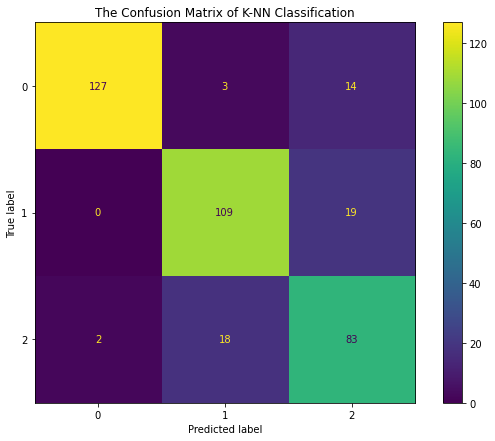

In [ ]:
# the confusion matrix K-NN Classification 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(ml_knn_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=ml_knn_clf.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of K-NN Classification")
plt.show()

In [ ]:
# K-NN Classification report
from sklearn.metrics import classification_report
ml_knn_clf.fit(X_train, y_train)
y_pred = ml_knn_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       129
           1       0.85      0.84      0.84       130
           2       0.81      0.72      0.76       116

    accuracy                           0.85       375
   macro avg       0.85      0.85      0.84       375
weighted avg       0.85      0.85      0.85       375



###**b) Random Forest Classification**

In [ ]:
# define the estimator/model
from sklearn.ensemble import RandomForestClassifier

ml_rf_clf = RandomForestClassifier()
ml_rf_clf.fit(X_train, y_train)

RandomForestClassifier()

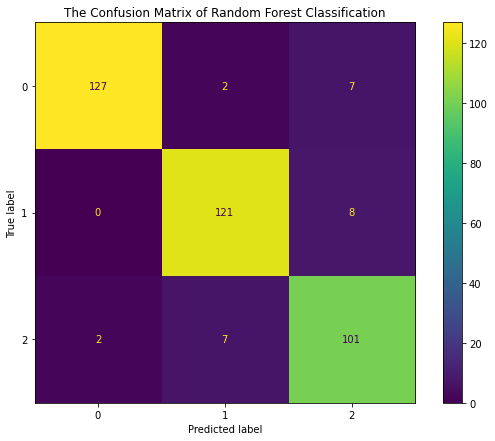

In [ ]:
# the confusion matrix Random Forest Classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(ml_rf_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=ml_rf_clf.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of Random Forest Classification")
plt.show()

In [ ]:
# Random Forest Classification report
from sklearn.metrics import classification_report
ml_rf_clf.fit(X_train, y_train)
y_pred = ml_rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       129
           1       0.94      0.93      0.93       130
           2       0.92      0.87      0.89       116

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



###**c) Logistic Regression (LogReg)**

In [ ]:
# define the estimator/model
from sklearn.linear_model import LogisticRegression

ml_lr_clf = LogisticRegression()
ml_lr_clf.fit(X_train, y_train)

LogisticRegression()

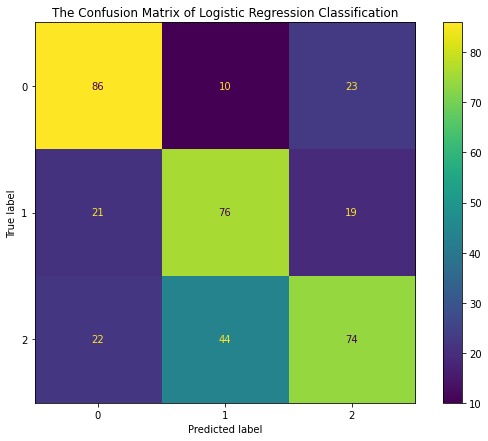

In [ ]:
# the confusion matrix Random Forest Classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(ml_lr_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=ml_lr_clf.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of Logistic Regression Classification")
plt.show()

In [ ]:
# Random Forest Classification report
from sklearn.metrics import classification_report
ml_lr_clf.fit(X_train, y_train)
y_pred = ml_lr_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       129
           1       0.66      0.58      0.62       130
           2       0.53      0.64      0.58       116

    accuracy                           0.63       375
   macro avg       0.64      0.63      0.63       375
weighted avg       0.64      0.63      0.63       375



###**d) Support Vector Classification**

In [ ]:
# define the estimator/ model
from sklearn.svm import SVC

ml_sv_clf = SVC()
ml_sv_clf.fit(X_train, y_train)

SVC()

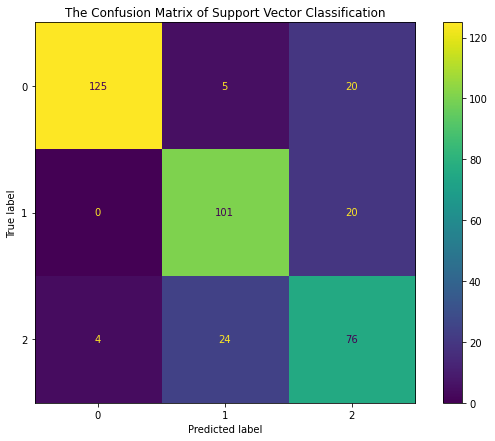

In [ ]:
# the confusion matrix Random Forest Classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(ml_sv_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=ml_sv_clf.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of Support Vector Classification")
plt.show()

In [ ]:
# Support Vector Classification report
from sklearn.metrics import classification_report
ml_sv_clf.fit(X_train, y_train)
y_pred = ml_sv_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       129
           1       0.83      0.78      0.80       130
           2       0.73      0.66      0.69       116

    accuracy                           0.81       375
   macro avg       0.80      0.80      0.80       375
weighted avg       0.80      0.81      0.80       375



###**e) Decision Tree Classification**

In [ ]:
# define Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier

ml_dt_clf = DecisionTreeClassifier()
ml_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

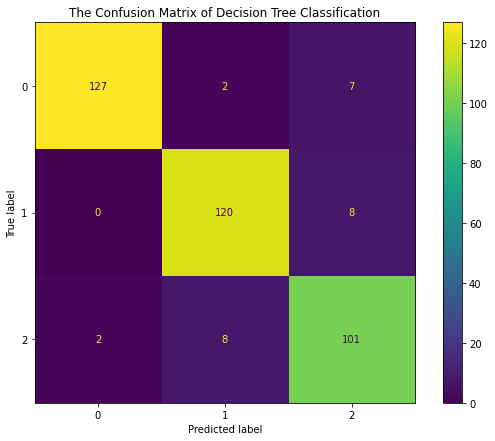

In [ ]:
# the confusion matrix Random Forest Classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(ml_dt_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=ml_dt_clf.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of Decision Tree Classification")
plt.show()

In [ ]:
# Support Vector Classification report
from sklearn.metrics import classification_report
ml_dt_clf.fit(X_train, y_train)
y_pred = ml_dt_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       129
           1       0.94      0.92      0.93       130
           2       0.91      0.87      0.89       116

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



###**f) Gaussian Naive Bayes**

In [ ]:
# define Decision Tree classifier model
from sklearn.naive_bayes import GaussianNB

ml_gnb_clf = GaussianNB()
ml_gnb_clf.fit(X_train, y_train)

GaussianNB()

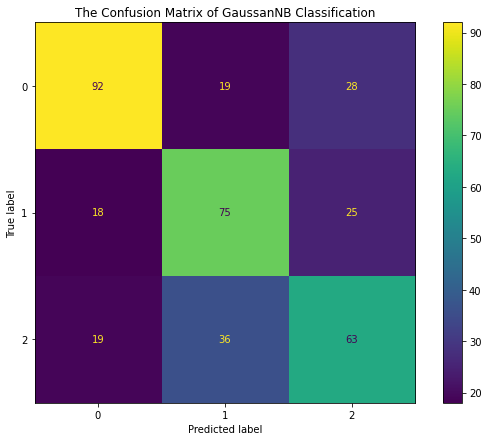

In [ ]:
# the confusion matrix Random Forest Classification
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(ml_gnb_clf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=ml_gnb_clf.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of GaussanNB Classification")
plt.show()

In [ ]:
# Support Vector Classification report
from sklearn.metrics import classification_report
ml_gnb_clf.fit(X_train, y_train)
y_pred = ml_gnb_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       129
           1       0.64      0.58      0.60       130
           2       0.53      0.54      0.54       116

    accuracy                           0.61       375
   macro avg       0.61      0.61      0.61       375
weighted avg       0.61      0.61      0.61       375



##**8) Fitting The ML Model Classification with Hyperparameter Tuning (Balanced Data)**

###**a) K-NN Classification**

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='accuracy')
knn_clf_gridcv.fit(X_train, y_train)

CPU times: user 1.59 s, sys: 0 ns, total: 1.59 s
Wall time: 2.31 s


In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.918000,1
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.915333,2
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.913333,3
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.912000,4
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.911333,5
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.910667,6
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.908667,7
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.885333,8
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.882667,9
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.856667,10


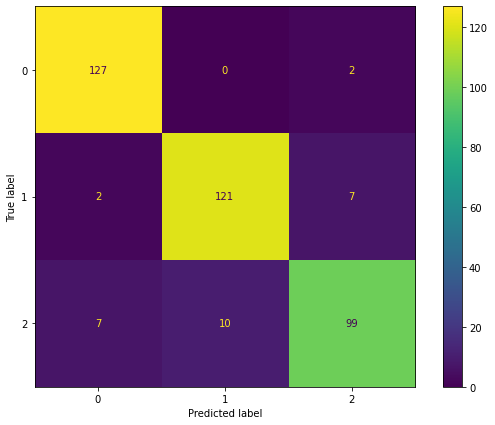

In [ ]:
# the confusion matrix K-NN Classification with GridCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# K-NN Classification report with GridCV
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       129
           1       0.92      0.93      0.93       130
           2       0.92      0.85      0.88       116

    accuracy                           0.93       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.93      0.92       375



###**b) Random Forest Classification**

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50,60,70,80,100),
    'max_depth':(1,2,3,4,5,6,7,8,9,10)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 48.6 s, sys: 185 ms, total: 48.8 s
Wall time: 49.7 s


In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
88,"{'max_depth': 10, 'n_estimators': 80}",0.906000,1
87,"{'max_depth': 10, 'n_estimators': 70}",0.904667,2
86,"{'max_depth': 10, 'n_estimators': 60}",0.903333,3
89,"{'max_depth': 10, 'n_estimators': 100}",0.900667,4
83,"{'max_depth': 10, 'n_estimators': 30}",0.900000,5
...,...,...,...
6,"{'max_depth': 1, 'n_estimators': 70}",0.616667,86
7,"{'max_depth': 1, 'n_estimators': 80}",0.616000,87
1,"{'max_depth': 1, 'n_estimators': 20}",0.614000,88
8,"{'max_depth': 1, 'n_estimators': 100}",0.605333,89


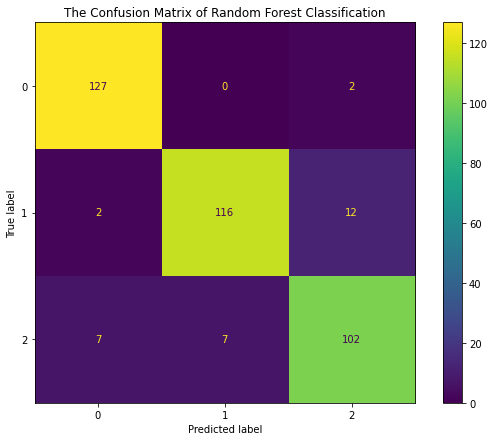

In [ ]:
# the confusion matrix Random Forest with GridCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of Random Forest Classification")
plt.show()

In [ ]:
# Random Forest classification report with GridCV
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       129
           1       0.94      0.89      0.92       130
           2       0.88      0.88      0.88       116

    accuracy                           0.92       375
   macro avg       0.92      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



###**c) Logistic Regression (LogReg)**

In [ ]:
# define LogReg classifier model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# note: we use recall
lr_clf_gridcv = GridSearchCV(lr_clf,parameters, cv=5, scoring='accuracy')
lr_clf_gridcv.fit(X_train, y_train)

CPU times: user 3.07 s, sys: 7.62 ms, total: 3.08 s
Wall time: 3.07 s


In [ ]:
# the results
cv_result = pd.DataFrame(lr_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.629333,1
8,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.627333,2
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.614667,3
4,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.614667,3
6,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.613333,5
7,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.613333,5
11,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.612667,7
14,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.612000,8
9,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.610000,9
10,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.610000,9


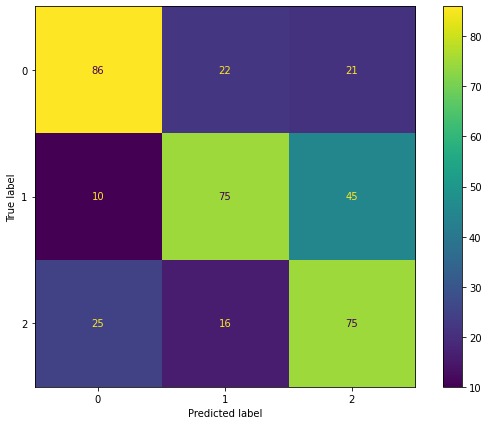

In [ ]:
# the confusion matrix LogReg with GridCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = lr_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=lr_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lr_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Logistic Regression Classification report with GridCV
from sklearn.metrics import classification_report
y_pred = lr_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       129
           1       0.66      0.58      0.62       130
           2       0.53      0.65      0.58       116

    accuracy                           0.63       375
   macro avg       0.64      0.63      0.63       375
weighted avg       0.64      0.63      0.63       375



###**d) Support Vector Classification**

In [ ]:
# define SVM classifier model
from sklearn.svm import SVC

sv_clf = SVC()

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# note: we use recall
sv_clf_gridcv = GridSearchCV(sv_clf, parameters, cv=5, scoring='accuracy')
sv_clf_gridcv.fit(X_train, y_train)

CPU times: user 13.8 s, sys: 10.7 ms, total: 13.8 s
Wall time: 13.8 s


In [ ]:
# the results
cv_result = pd.DataFrame(sv_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
20,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.920000,1
10,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.919333,2
21,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.918667,3
16,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.918667,3
15,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.918667,5
5,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.912000,6
11,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.877333,7
22,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",0.851333,8
0,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.784000,9
6,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.773333,10


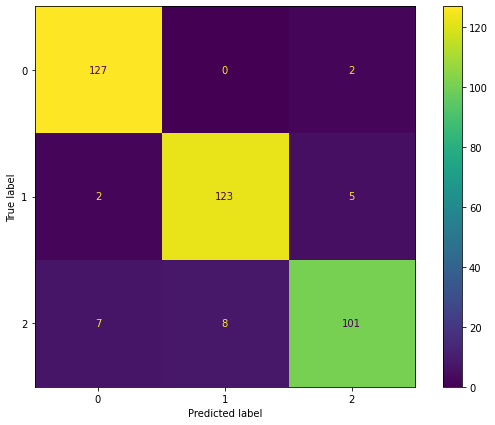

In [ ]:
# the confusion matrix K-NN Classification with GridCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = sv_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=sv_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=sv_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.
plt.show()

In [ ]:
# Random Forest classification report with GridCV
from sklearn.metrics import classification_report
y_pred = sv_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       129
           1       0.94      0.95      0.94       130
           2       0.94      0.87      0.90       116

    accuracy                           0.94       375
   macro avg       0.94      0.93      0.93       375
weighted avg       0.94      0.94      0.94       375



###**e) Decision Tree Classification**

In [ ]:
# define Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state= 42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [5,10,20,30,40,50,60,70,80,90,100],
    'criterion': ['gini','entropy','log_loss']
}

# note: we use recall
dt_clf_gridcv = GridSearchCV(dt_clf, parameters, cv=5, scoring='accuracy')
dt_clf_gridcv.fit(X_train, y_train)

CPU times: user 1.28 s, sys: 4.89 ms, total: 1.28 s
Wall time: 1.78 s


In [ ]:
# the results
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
9,"{'criterion': 'gini', 'max_depth': 90}",0.918000,1
2,"{'criterion': 'gini', 'max_depth': 20}",0.918000,1
3,"{'criterion': 'gini', 'max_depth': 30}",0.918000,1
4,"{'criterion': 'gini', 'max_depth': 40}",0.918000,1
5,"{'criterion': 'gini', 'max_depth': 50}",0.918000,1
6,"{'criterion': 'gini', 'max_depth': 60}",0.918000,1
7,"{'criterion': 'gini', 'max_depth': 70}",0.918000,1
8,"{'criterion': 'gini', 'max_depth': 80}",0.918000,1
10,"{'criterion': 'gini', 'max_depth': 100}",0.918000,1
17,"{'criterion': 'entropy', 'max_depth': 60}",0.915333,10


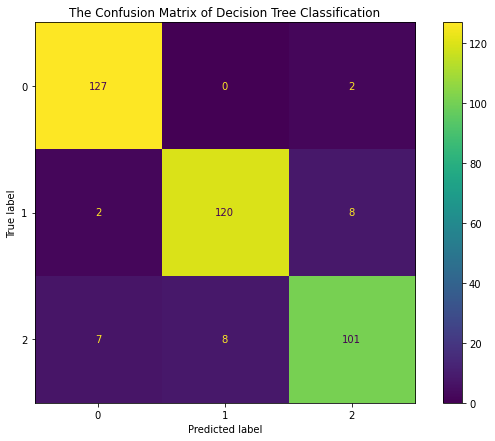

In [ ]:
# the confusion matrix K-NN Classification with GridCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.title("The Confusion Matrix of Decision Tree Classification")
plt.show()

In [ ]:
# Decision Tree classification report with GridCV
from sklearn.metrics import classification_report
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       129
           1       0.94      0.92      0.93       130
           2       0.91      0.87      0.89       116

    accuracy                           0.93       375
   macro avg       0.93      0.93      0.93       375
weighted avg       0.93      0.93      0.93       375



###**f) Gaussian Naive Bayes**

In [ ]:
# Gaussian Naive Bayes Tree classifier model
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# note: we use recall
gnb_clf_gridcv = GridSearchCV(gnb_clf, parameters, cv=5, scoring='accuracy')
gnb_clf_gridcv.fit(X_train, y_train)

CPU times: user 2.44 s, sys: 10.9 ms, total: 2.46 s
Wall time: 2.46 s


In [ ]:
# the results
cv_result = pd.DataFrame(gnb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
18,{'var_smoothing': 0.02310129700083159},0.644667,1
19,{'var_smoothing': 0.01873817422860384},0.644000,2
20,{'var_smoothing': 0.01519911082952933},0.643333,3
17,{'var_smoothing': 0.02848035868435802},0.642667,4
21,{'var_smoothing': 0.012328467394420659},0.642000,5
...,...,...,...
4,{'var_smoothing': 0.43287612810830584},0.568667,96
3,{'var_smoothing': 0.533669923120631},0.566667,97
1,{'var_smoothing': 0.8111308307896871},0.560000,98
2,{'var_smoothing': 0.657933224657568},0.559333,99


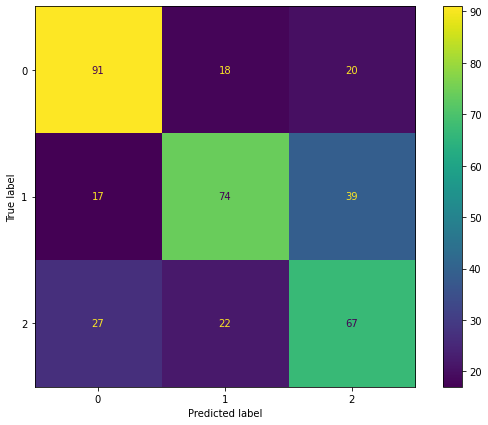

In [ ]:
# the confusion matrix K-NN Classification with GridCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = gnb_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=gnb_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=gnb_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# Random Forest classification report with GridCV
from sklearn.metrics import classification_report
y_pred = gnb_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       129
           1       0.65      0.57      0.61       130
           2       0.53      0.58      0.55       116

    accuracy                           0.62       375
   macro avg       0.62      0.62      0.62       375
weighted avg       0.62      0.62      0.62       375



##**9) Feature Importances**

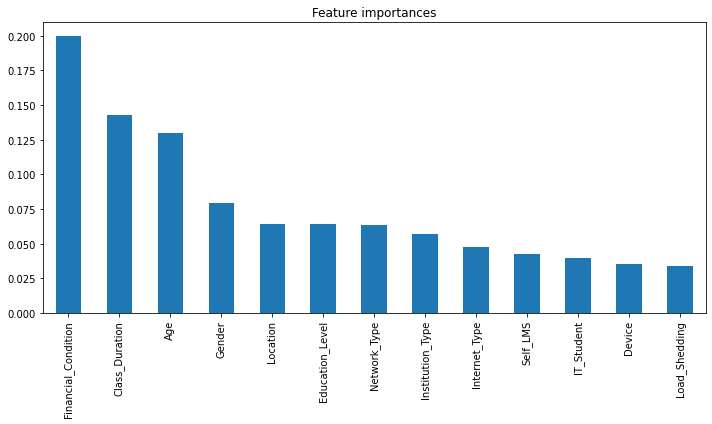

In [ ]:
from sklearn.inspection import permutation_importance

importances = rf_clf_gridcv.best_estimator_.feature_importances_

fig, ax = plt.subplots(figsize=(10,6))

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,Y)
p_values = pd.Series(np.around(chi_scores[1], decimals=3), index=X.columns)
p_values.sort_values(ascending= False , inplace= True)
p_values

Load_Shedding          0.435
Device                 0.152
Network_Type           0.139
Gender                 0.049
Education_Level        0.013
Internet_Type          0.002
IT_Student             0.001
Age                    0.000
Institution_Type       0.000
Location               0.000
Financial_Condition    0.000
Class_Duration         0.000
Self_LMS               0.000
dtype: float64